In [1]:
#토큰화 + 정수인코딩해주기
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
train_text="The earth is an awesome place live"

#단어집합 생성
tokenizer.fit_on_texts([train_text])

#정수 인코딩
sub_text="the earth is an great place live"
sequences=tokenizer.texts_to_sequences([sub_text])[0]

print('정수인코딩:',sequences)
print('단어집합:', tokenizer.word_index)

정수인코딩: [1, 2, 3, 4, 6, 7]
단어집합: {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [2]:
#샘플들 길이 맞춰주기
#패딩- 0채워서 길이맞춰주기 + 긴건 자르기

#첫번째=패딩할데티어 두번쨰=정규화할 길이
pad_sequences([[1,2,3],[3,4,5,6],[7,8]],maxlen=3,padding='pre') #pre는 앞에 0채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

#워드임베딩(의사코드 예시)

In [4]:
##의사코드

#1 토큰화
tokenized_text=[['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

#2 각 단어에 대한 정수 인코딩
encoded_text = [[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]]

vocab_size=7
embedding_dim=2

In [5]:
#임베딩 층 추가 예시
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding

model = Sequential()
model.add(Embedding(vocab_size, output_dim=1, input_length=5))

In [6]:
#dense>>첫번쨰인자 : 출력 차원수, 두번쨰- 입력 차원수, 세번쨰는 활성화함수
model.add(Dense(1,input_dim=3,activation='relu'))

In [7]:
model=Sequential()
model.add(Dense(8,input_dim=4,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


#컴파일과 훈련
####RNN을 이용한 이진분류

In [9]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential

vocab_size=5000
embedding_dim=32
hidden_units=32

In [10]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________


#sequential api, functional api 차이

In [15]:
#func api>>> 각 층을 함수로서 정의
#더 복잡한 신경망 구현

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [17]:
#Input() 함수에 입력의 크기 정의
#이전층을 다음층 함수의 입력으로 사용하고, 변수로 할당.

inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#FFNN
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

In [ ]:
#선형회귀 fnc_api로
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

#댜중입력,다중출력하는 모델

In [23]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

In [28]:
inputA=Input(shape=(64,))
inputB=Input(shape=(128,))

#첫번쨰 입력층에서분기되는 인공신경망
x=Dense(16,activation="relu")(inputA)
x=Dense(8,activation="relu")(x)
x=Model(inputs=inputA,outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

#두개의 인공신경망의 출력을 연결(concatenate 함수)
result=concatenate([x.output,y.output])

z=Dense(2,activation="relu")(result)
z=Dense(1,activation="linear")(z)

model=Model(inputs=[x.input,y.input],outputs=z)

#뉴스기사 전처리 연습

In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [5]:
#사이킷런서 훈련데이터받기
newsdata = fetch_20newsgroups(subset = 'train')

In [6]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [7]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [9]:
#타겟 갯수 확인하기
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [14]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


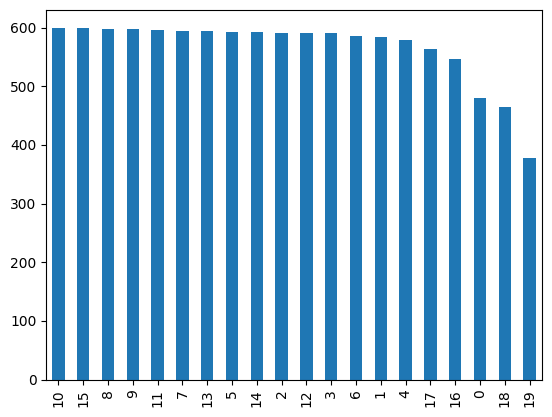

In [15]:
data['target'].value_counts().plot(kind='bar');

In [19]:
#훈련데이터, 테스트데이터 분리,준비
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [20]:
vocab_size = 10000
num_classes = 20

In [21]:
 # 전처리 함수
def prepare_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words = vocab_size)
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, tokenizer.index_word

In [22]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [23]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [24]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


#MLP를 사용한 텍스트분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [25]:
#4개모드 모두해보기
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 7s 13ms/step - loss: 2.2629 - accuracy: 0.3483 - val_loss: 0.9452 - val_accuracy: 0.8313
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 0.8692 - accuracy: 0.7647 - val_loss: 0.4419 - val_accuracy: 0.8940
Epoch 3/5
80/80 [==============================] - 1s 7ms/step - loss: 0.4352 - accuracy: 0.8838 - val_loss: 0.3487 - val_accuracy: 0.8966
Epoch 4/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2596 - accuracy: 0.9367 - val_loss: 0.3047 - val_accuracy: 0.9170
Epoch 5/5
80/80 [==============================] - 1s 7ms/step - loss: 0.1719 - accuracy: 0.9565 - val_loss: 0.2867 - val_accuracy: 0.9170
binary 모드의 테스트 정확도: 0.8264737129211426
Epoch 1/5
80/80 [==============================] - 2s 10ms/step - loss: 2.7550 - accuracy: 0.2614 - val_loss: 1.5272 - val_accuracy: 0.7306
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 1.4133 - accuracy: 0.6489 - val_loss: 0.6991 - val_acc